In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as snb
import matplotlib.pyplot as plt
import folium
import json

In [2]:
data = pd.read_csv('food-inspections.csv')
data.head()


,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,...,Results,Violations,Latitude,Longitude,Location,Historical Wards 2003-2015,Zip Codes,Community Areas,Census Tracts,Wards
0,2345323,ARMAND'S PIZZERIA,ARMAND'S PIZZERIA,2698587.0,Restaurant,Risk 1 (High),29 N WACKER DR,CHICAGO,IL,60606.0,...,Pass w/ Conditions,"3. MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL E...",41.882700,-87.636638,"{'longitude': '41.88270035458986', 'latitude':...",NaN,NaN,NaN,NaN,NaN
1,2345321,GOPUFF,GOPUFF,2684560.0,Grocery Store,Risk 3 (Low),1801 W WARNER AVE,CHICAGO,IL,60613.0,...,Pass,NaN,41.956846,-87.674395,"{'longitude': '41.956845683288854', 'latitude'...",NaN,NaN,NaN,NaN,NaN
2,2345325,TACO MAX MEXICAN GRILL,TACO MAX MEXICAN GRILL,2699082.0,Restaurant,Risk 1 (High),3402 W MONTROSE AVE,CHICAGO,IL,60618.0,...,Pass w/ Conditions,"3. MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL E...",41.961238,-87.713284,"{'longitude': '41.961237630038035', 'latitude'...",NaN,NaN,NaN,NaN,NaN
3,2345370,CAFE BALLOU,CAFE BALLOU & DELI,2433048.0,Restaurant,Risk 1 (High),939 N WESTERN AVE,CHICAGO,IL,60622.0,...,No Entry,NaN,41.898706,-87.686773,"{'longitude': '41.89870606533506', 'latitude':...",NaN,NaN,NaN,NaN,NaN
4,2345376,GARIBAY POULTRY,GARIBAY POULTRY,1908500.0,CUSTOM POULTRY SLAUGHTER,Risk 2 (Medium),2100 S CALIFORNIA AVE,CHICAGO,IL,60608.0,...,Pass,47. FOOD & NON-FOOD CONTACT SURFACES CLEANABLE...,41.853688,-87.695652,"{'longitude': '41.85368770723974', 'latitude':...",NaN,NaN,NaN,NaN,NaN


In [3]:
loc= data[["Latitude","Longitude","AKA Name","Risk"]]
missing = loc[loc.isnull().any(axis = 1)]
data_removed = data.drop(missing.index)
data_removed = data_removed.reset_index()


In [4]:
len(data_removed)

192625

In [5]:
fac = (data['Facility Type'].value_counts())
len(fac)

488

In [6]:
data.describe()

,Inspection ID,License #,Zip,Latitude,Longitude,Historical Wards 2003-2015,Zip Codes,Community Areas,Census Tracts,Wards
count,1.957960e+05,1.957790e+05,195746.000000,195108.000000,195108.000000,0.0,0.0,0.0,0.0,0.0
mean,1.444727e+06,1.598667e+06,60628.731014,41.881236,-87.676821,NaN,NaN,NaN,NaN,NaN
std,6.339093e+05,8.961571e+05,122.239333,0.080840,0.058966,NaN,NaN,NaN,NaN,NaN
min,4.424700e+04,0.000000e+00,10014.000000,41.644670,-87.914428,NaN,NaN,NaN,NaN,NaN
25%,1.150540e+06,1.224021e+06,60614.000000,41.835065,-87.707779,NaN,NaN,NaN,NaN,NaN
50%,1.490794e+06,1.979467e+06,60625.000000,41.891920,-87.666812,NaN,NaN,NaN,NaN,NaN
75%,1.995473e+06,2.234238e+06,60643.000000,41.939814,-87.634955,NaN,NaN,NaN,NaN,NaN
max,2.345376e+06,9.999999e+06,60827.000000,42.021064,-87.525094,NaN,NaN,NaN,NaN,NaN


In [7]:
print("The possible results for each facilites are the follwoing with the results given by:")
display(data['Results'].value_counts())

The possible results for each facilites are the follwoing with the results given by:


Pass                    105795
Fail                     37870
Pass w/ Conditions       27105
Out of Business          16844
No Entry                  6237
Not Ready                 1877
Business Not Located        68
Name: Results, dtype: int64

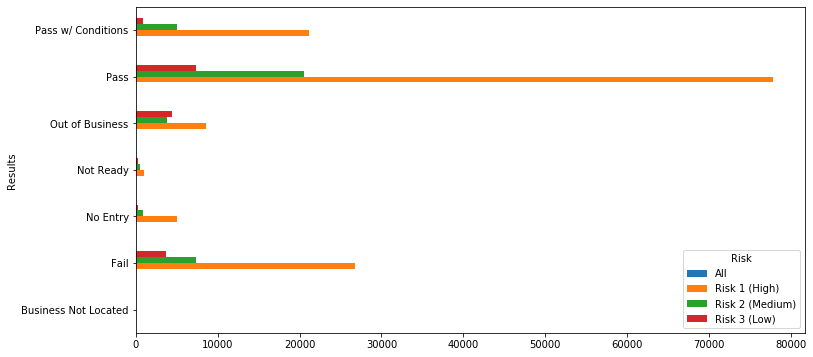

In [8]:
facility = data.groupby("Risk")
facility['Results'].value_counts().unstack(0).plot.barh(figsize=(12,6))
plt.show()

In [9]:
coord = [data_removed["Latitude"][0],data_removed["Longitude"][0]]
m= folium.Map(location= coord,tiles='Stamen Toner', zoom_start=10)
m

In [53]:
with open('chicago_zctas.geojson','r') as jsonFile:
    new_data = json.load(jsonFile)
tmp = new_data

#Create new JSON object
new_json = dict.fromkeys(['types','features'])
new_json['type'] = 'FeatureCollection'
new_json['features'] = "features"

# Save new JSON object
open("updated-file.json","w").write(json.dumps(new_json,sort_keys = True, indent = 4,separators=(",",":")))

79

In [64]:
def create_map(table,zips,add_text=""):
    chicago_geo = r'updated-file.json'
    # initiating a Folium map with longitude and latitude
    m = folium.Map(location = coord,tiles='Stamen Toner', zoom_start = 11)
    # creating a choropleth map
    m.choropleth(
        geo_data = chicago_geo,
        fill_opacity = 0.7,
        line_opacity = 0.2,
        data = table,
        # refers to which key within the GeoJSON to map the ZIP code to
        key_on = 'feature.properties.name',
        # first element contains location information, second element contains feature of interest
        columns = [zips],
        fill_color = 'RdYlGn',
        #legend_name = (' ').join(mapped_feature.split('_')).title() + ' ' + add_text + ' Across LA'
    )
    folium.LayerControl().add_to(m)
    # save map with filename based on the feature of interest
    m.save(outfile = mapped_feature + '_map.html')